In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [2]:
files= os.listdir(r'D:\5.DataAnalysis\2\Covid-19-20230401T135757Z-001\Covid-19')
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [13]:
def read_data (Path , file_name) :
    return pd.read_csv(Path + '\\' + file_name )

In [14]:
Path = r'D:/5.DataAnalysis/2/Covid-19-20230401T135757Z-001/Covid-19'

In [22]:
#Create the data frames
covid_country_df = read_data(Path , files[0])
covid_day_df = read_data(Path , files[2])
covid_grouped_df = read_data(Path , files[3])
covid_usa_df  = read_data(Path , files[4])
covid_wd_df =  read_data(Path , files[5])

## 1 - Creat a tree map and a pie charts for top 15 countries based on the total cases, total deaths,active cases and any other relevant data

In [24]:
#First we need to know which df(s) have these data
covid_country_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [25]:
covid_day_df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [26]:
covid_grouped_df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [28]:
covid_wd_df.head()
#This df will be used as it has the total values.

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [32]:
covid_wd_df.shape

(209, 16)

In [30]:
#Check th null data
covid_wd_df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [ ]:
#Most the null data are in countries which has no data + for the New Cases and New Deaths col, those cols can be ignored
#as it wont be of use for futher analysis

#To creat a tree map we can use px as follows:
px.treemap(data_frame =covid_wd_df.iloc[0:15] , names='Country/Region' , values='TotalCases' ,path=['Country/Region'],
           title='Tree map for top 15 countries based on their Total Cases' ,template='ggplot2')

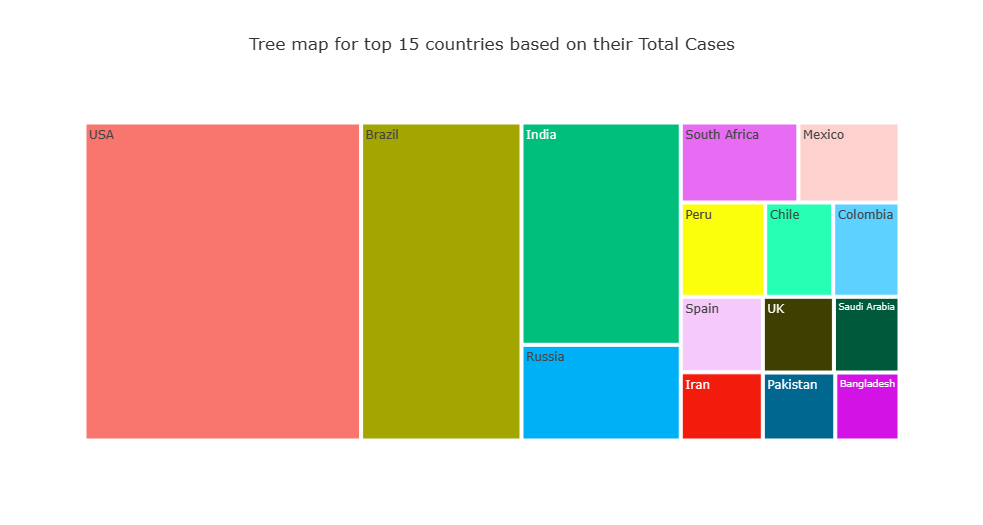

In [ ]:
#Other than Total Cases, the following cols are also relevant
columns = [ 'TotalDeaths' , 'TotalRecovered' , 'ActiveCases' ]
for i in columns:
    fig=px.treemap(data_frame =covid_wd_df.iloc[0:15] , names='Country/Region' , values=i ,path=['Country/Region'] ,
               title='Tree map for different countries based on their {}'.format(i),template='ggplot2')
    fig.show()

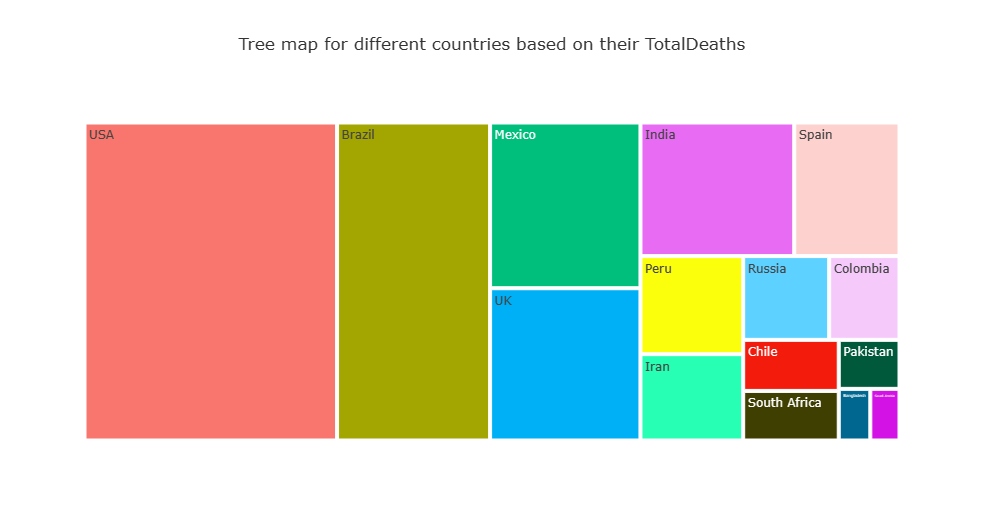
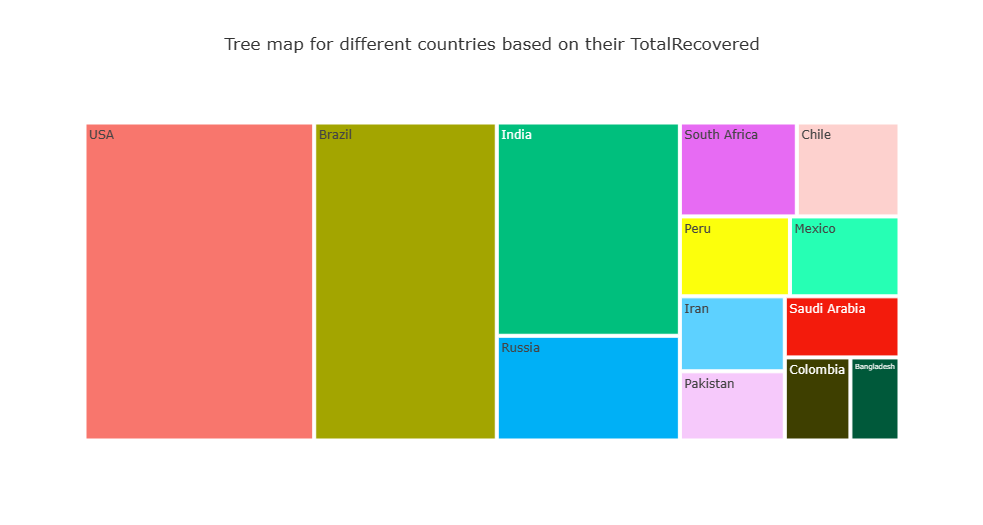
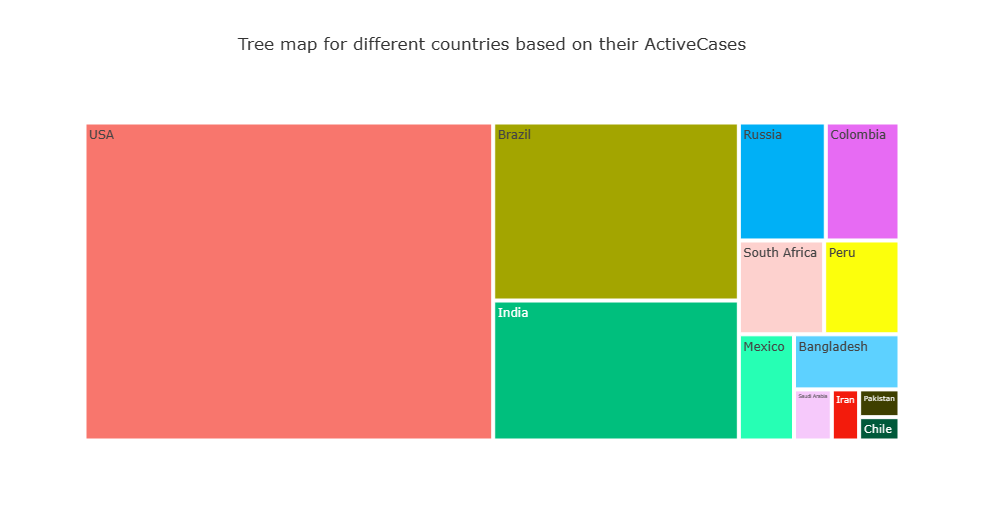

In [ ]:
Label =covid_wd_df['Country/Region'][0:15]
Cases = ['TotalCases' , 'TotalDeaths' , 'TotalRecovered' , 'ActiveCases' ]
for i in Cases:
    fig= px.pie(data_frame=covid_wd_df.iloc[0:15], values=i ,names= Label ,
               title='15 Worst effected countries based on their {}'.format(i) , hole=0.5)
    fig.show()

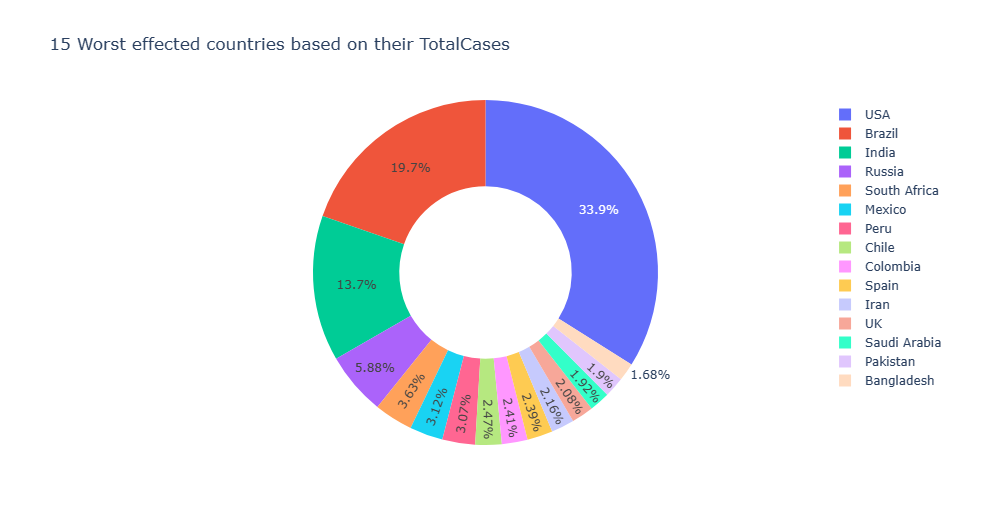
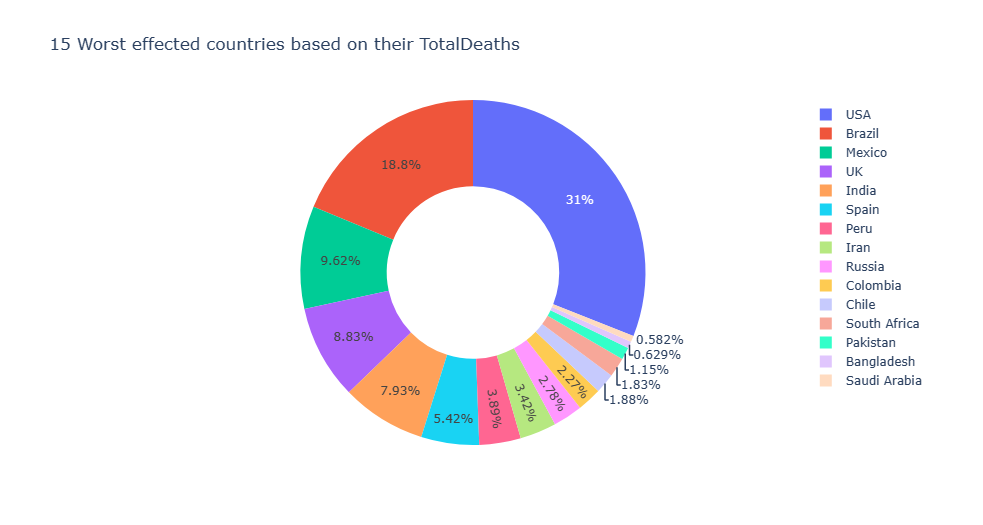
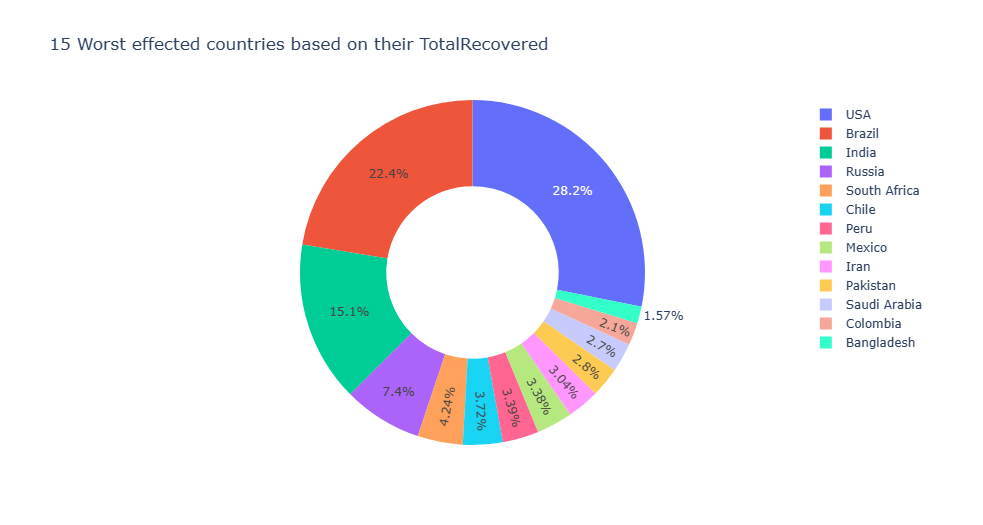
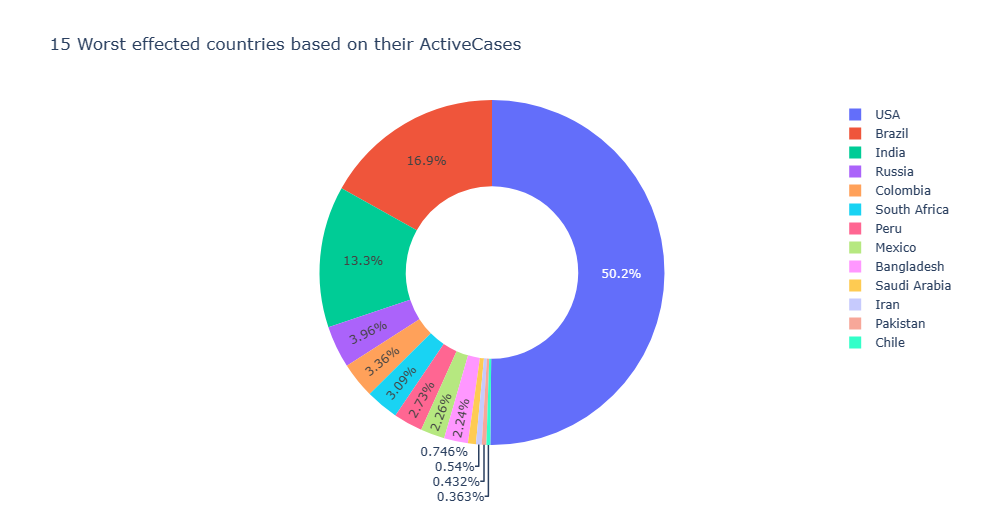

## 2-What is the general trend in cases of confirmed , recoveries , Deaths and Active Cases?

In [55]:
#We need to use the covid_day_df 
covid_day_df.head() 

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
#We can plot the date vs both confirmed deaths and recoveries
px.line(data_frame=covid_day_df , x='Date' , y=['Confirmed', 'Deaths', 'Recovered', 'Active'], title='Covid Cases ',
      template='plotly_dark' )

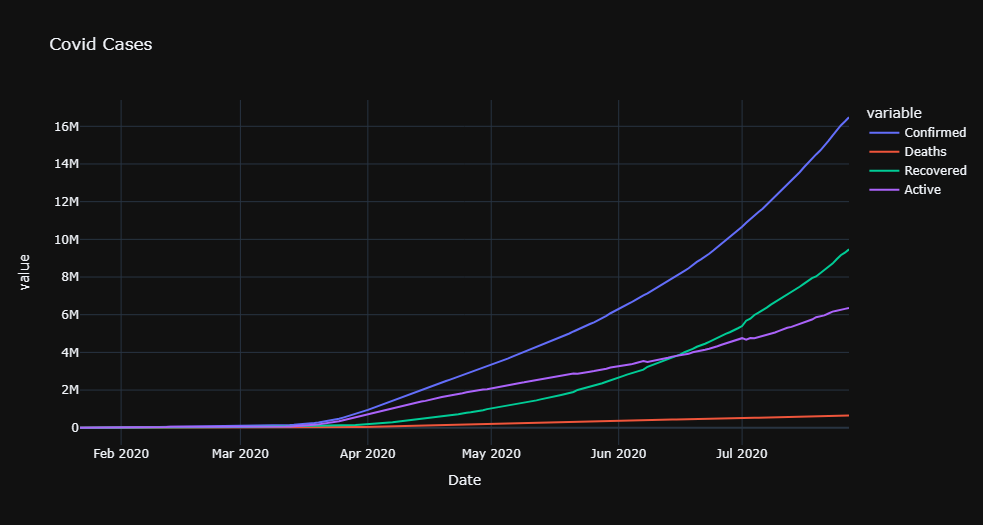

## 3- Analyse the populations to tests done ratio (for the top 15 countries based on total cases)

In [60]:
#Back to covid_wd_df , we need to create a new column for the ratio 
covid_wd_df['Pop/Test'] = covid_wd_df['Population'] / covid_wd_df['TotalTests']
covid_wd_df['Pop/Test']

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
         ...    
204    81.836066
205    61.903302
206     1.921256
207          NaN
208          NaN
Name: Pop/Test, Length: 209, dtype: float64

In [111]:
covid_wd15_df = covid_wd_df.nlargest(15 , 'TotalCases')
covid_wd15_df[['Country/Region' , 'Pop/Test' ]]

,Country/Region,Pop/Test
0,USA,5.245489
1,Brazil,16.106896
2,India,62.365033
3,Russia,4.911040
4,South Africa,18.852446
5,Mexico,122.115932
6,Peru,13.241331
7,Chile,10.866949
8,Colombia,28.269105
9,Spain,6.618696


In [ ]:
px.bar(data_frame=covid_wd15_df,
       x='Country/Region' , y='Pop/Test' ,title= 'Population to Total Test Ratio' , color='Pop/Test' ,template='plotly_dark')

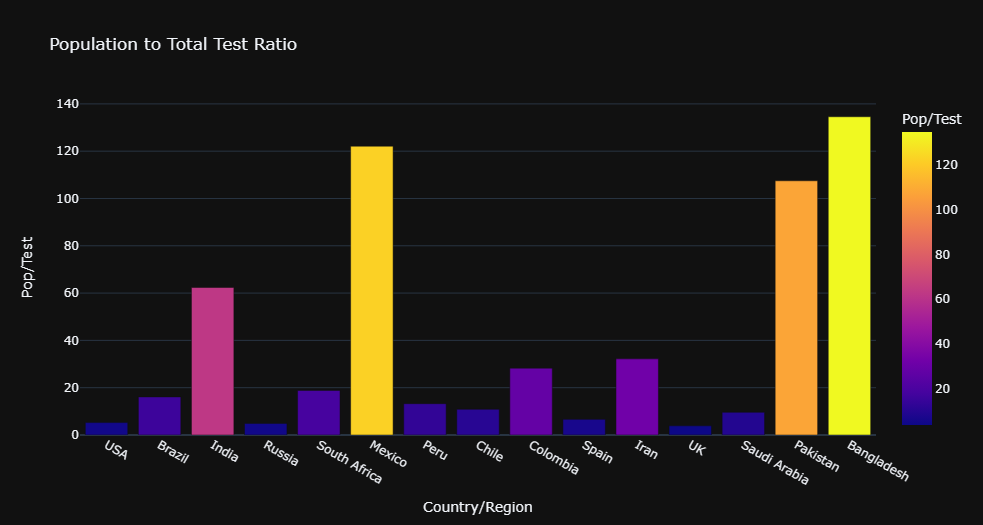

## 5- Based on ratio of  total deaths to the confirmed total cases, which countries are the most affected?

In [85]:
covid_wd_df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'Pop/Test'],
      dtype='object')

In [89]:
covid_wd_df['Death/Conf'] = covid_wd_df['TotalDeaths'] / covid_wd_df['TotalCases']
covid_wd_df[['Country/Region','Death/Conf' ]].sort_values('Death/Conf' , ascending=False)

,Country/Region,Death/Conf
131,Yemen,0.287330
19,France,0.154943
11,UK,0.150626
15,Italy,0.141198
35,Belgium,0.138551
...,...,...
202,Saint Kitts and Nevis,NaN
203,Greenland,NaN
205,Caribbean Netherlands,NaN
206,Falkland Islands,NaN


In [ ]:
px.bar(covid_wd_df[['Country/Region','Death/Conf' ]].sort_values('Death/Conf' , ascending=False),
      x='Country/Region' , y='Death/Conf' , color='Death/Conf',title='Death to Total Deaths Ratio' ,template='plotly_dark')

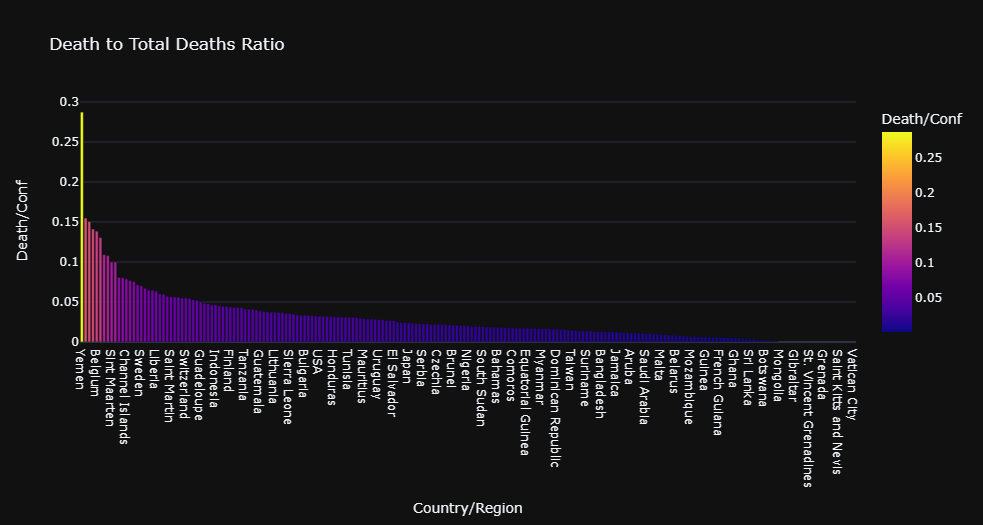

## 6- Date vs. different COVID statistics for various countries

In [113]:
from plotly.subplots import make_subplots

In [137]:
covid_grouped_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [149]:
#Let's use Joran as an example: 
covid_grouped_df[covid_grouped_df['Country/Region']=='Jordan']

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
88,2020-01-22,Jordan,0,0,0,0,0,0,0,Eastern Mediterranean
275,2020-01-23,Jordan,0,0,0,0,0,0,0,Eastern Mediterranean
462,2020-01-24,Jordan,0,0,0,0,0,0,0,Eastern Mediterranean
649,2020-01-25,Jordan,0,0,0,0,0,0,0,Eastern Mediterranean
836,2020-01-26,Jordan,0,0,0,0,0,0,0,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...
34309,2020-07-23,Jordan,1131,11,1035,85,11,0,0,Eastern Mediterranean
34496,2020-07-24,Jordan,1146,11,1035,100,15,0,0,Eastern Mediterranean
34683,2020-07-25,Jordan,1154,11,1036,107,8,0,1,Eastern Mediterranean
34870,2020-07-26,Jordan,1168,11,1041,116,14,0,5,Eastern Mediterranean


In [163]:
data_Jordan= covid_grouped_df[covid_grouped_df['Country/Region']=='Jordan'].loc[:,['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
data_Jordan

,Date,Confirmed,Deaths,Recovered,Active
88,2020-01-22,0,0,0,0
275,2020-01-23,0,0,0,0
462,2020-01-24,0,0,0,0
649,2020-01-25,0,0,0,0
836,2020-01-26,0,0,0,0
...,...,...,...,...,...
34309,2020-07-23,1131,11,1035,85
34496,2020-07-24,1146,11,1035,100
34683,2020-07-25,1154,11,1036,107
34870,2020-07-26,1168,11,1041,116


In [ ]:
fig =go.Scatter(x=data_Jordan['Date'] ,y= data_Jordan['Confirmed'])
iplot([fig])

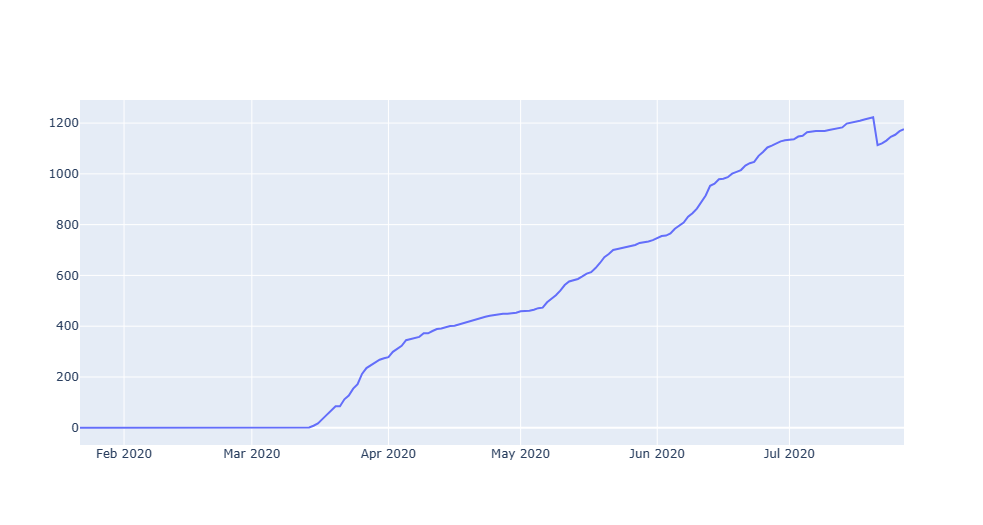

In [174]:
# To Automate the process for other COVID stats and for othe countries, we can create a function like this :
def country_stat (country,):
    data =covid_grouped_df[covid_grouped_df['Country/Region']==country]
    data2=data.loc[:,['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
    
    fig = make_subplots(rows=1, cols=4, subplot_titles=('Confirmed', 'Active', 'Recovered', 'Deaths'))
    
    fig.add_trace(
        go.Scatter(name='Confirmed', x=data2['Date'], y=data2['Confirmed']), row=1, col=1
    )
    fig.add_trace(
        go.Scatter(name='Deaths', x=data2['Date'], y=data2['Deaths']), row=1, col=2
    )
    fig.add_trace(
        go.Scatter(name='Recovered', x=data2['Date'], y=data2['Recovered']), row=1, col=3
    )
    fig.add_trace(
        go.Scatter(name='Active', x=data2['Date'], y=data2['Active']), row=1, col=4
    )
    
    fig.update_layout(
        height=500,
        width=1000,
        title_text='Date vs recorded cases of {}'.format(country),
        template='plotly_dark'
    )
    fig.show()
    

In [ ]:
country_stat('Jordan')

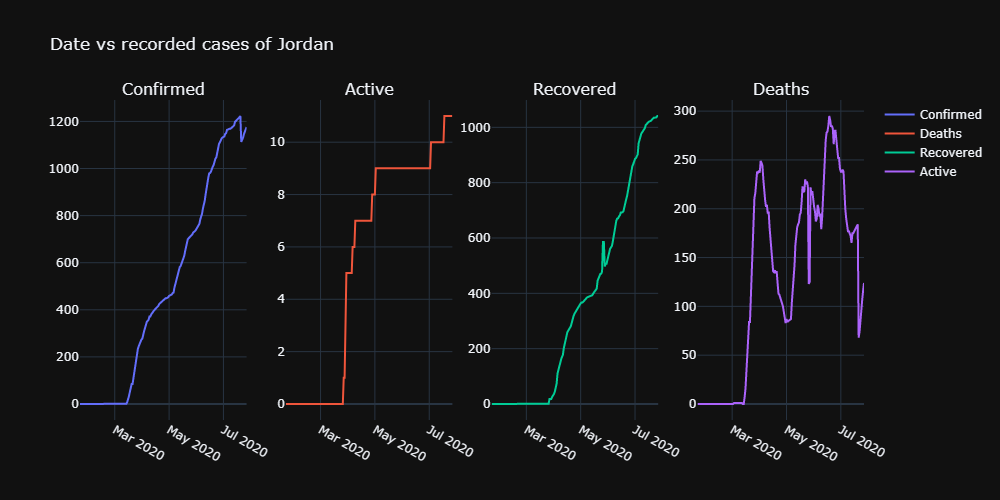